# Visualize a filter

In [2]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet #, imagenet_utils
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet import preprocess_input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
#import tqdm

In [3]:
def process_for_model(file):
    image = cv2.imread(file)
    image = cv2.resize(image, dsize=(254,254),interpolation=cv2.INTER_CUBIC)
#    image = preprocess_input(image)
    return image

In [4]:
corona = process_for_model('C:/Users/casti/Documents/COVID-19-imaging_analysis_Juan/keras-covid-19/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg')

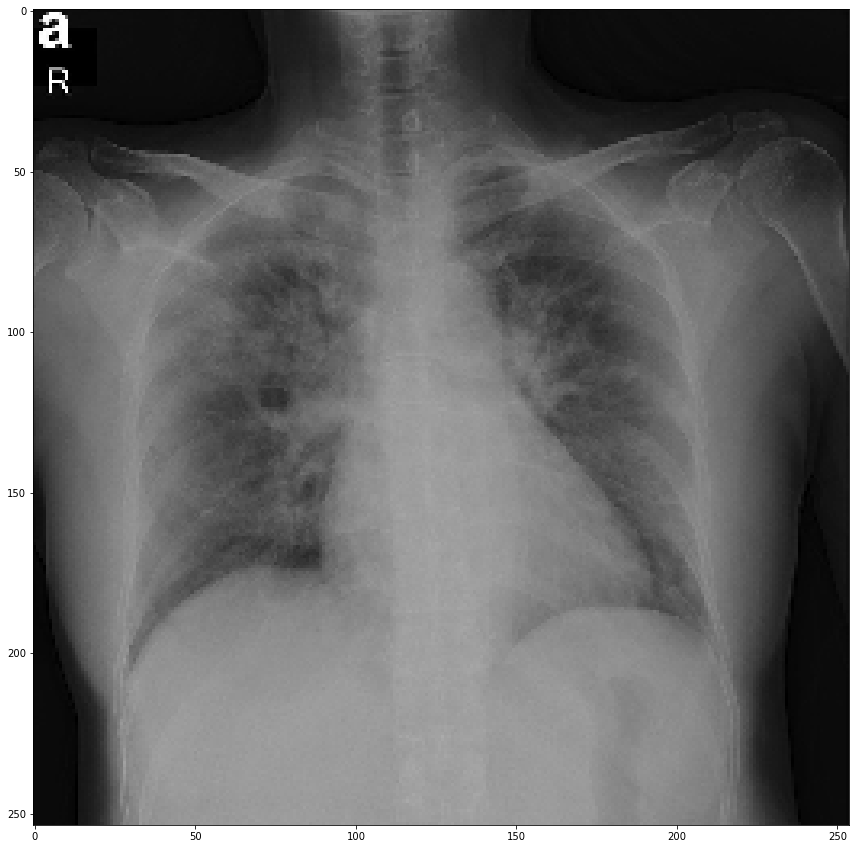

In [5]:
fig = plt.figure(figsize=(15, 15))
plt.gray()
plt.imshow(corona)

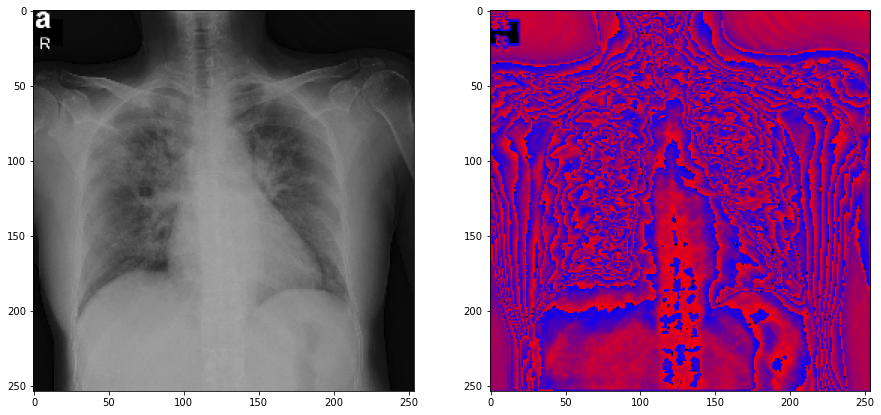

In [6]:
fig = plt.figure(figsize=(15, 15))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = corona
result = ndimage.sobel(corona, mode='constant', cval=0.0)
ax1.imshow(corona)
ax2.imshow(result)
plt.show()

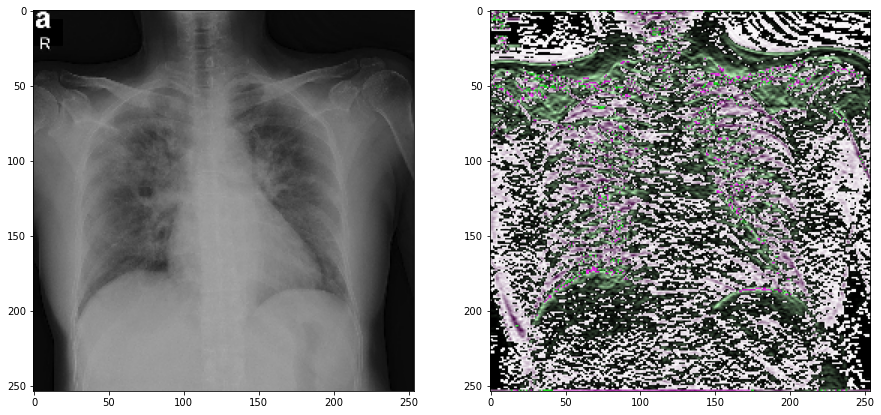

In [7]:
fig = plt.figure(figsize=(15, 15))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = corona
result = ndimage.sobel(corona, mode='constant', cval=0.0, axis=0)
ax1.imshow(corona)
ax2.imshow(result)
plt.show()

# Build a Model

In [8]:
# load the necessary modules
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

In [9]:
X = []
y = []
path = 'C:/Users/casti/Documents/COVID-19-imaging_analysis_Juan/keras-covid-19/both/'

train_data = os.listdir(path)

for picture in train_data:
    image = process_for_model(path+picture)
    X.append(image)
    if 'corona' in picture:
        y.append(0)
    else:
        y.append(1) 
X = np.array(X)
y = np.array(y)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [11]:
# load the data
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.2)

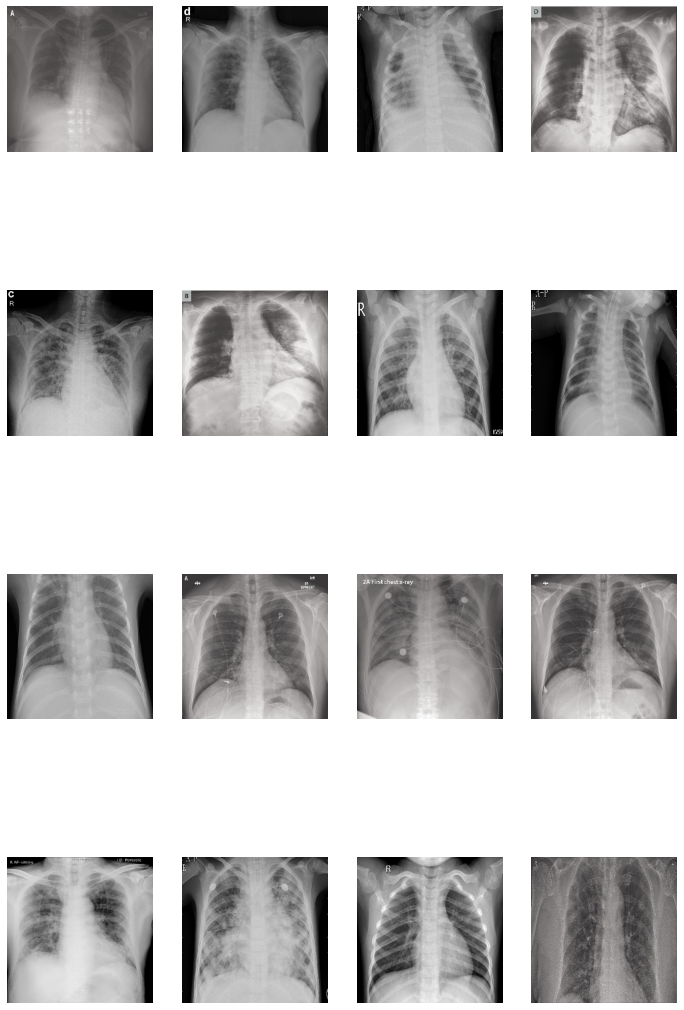

In [12]:
# inspect the data
plt.figure(figsize=(12,20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [13]:
xtrain.shape

(40, 254, 254, 3)

In [14]:
xtest.shape

(10, 254, 254, 3)

In [15]:
# reshape and normalize the data
xtrain = xtrain.reshape(40, 254, 254, 3)
xtest = xtest.reshape(10, 254, 254, 3)

In [16]:
# convert output to categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [17]:
xtest

array([[[[251, 251, 251],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 78,  75,  74],
         [ 84,  82,  81],
         [ 86,  84,  83],
         ...,
         [ 87,  83,  82],
         [ 92,  88,  87],
         [ 87,  85,  84]],

        [[ 78,  74,  74],
         [ 87,  83,  82],
         [ 85,  83,  82],
         ...,
         [ 81,  77,  76],
         [ 86,  84,  83],
         [ 80,  78,  77]],

        ...,

        [[100,  96,  95],
         [ 96,  92,  91],
         [100,  96,  95],
         ...,
         [108, 104, 103],
         [104, 100,  99],
         [100,  96,  95]],

        [[ 88,  86,  86],
         [102,  98,  97],
         [ 97,  93,  92],
         ...,
         [109, 105, 104],
         [103,  99,  98],
         [102,  98,  97]],

        [[ 85,  81,  81],
         [ 99,  95,  94],
         [ 98,  94,  93],
         ...,
         [105, 101, 100],
        

In [18]:
ytest

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [19]:
# define the model
baseModel = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(254, 254, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
    layer.trainable = True

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 63, 63, 128)       0     

In [21]:
# compile the model


In [22]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(xtrain, ytrain, epochs=5, batch_size=4, validation_split=0.2)

Train on 32 samples, validate on 8 samples
Epoch 1/5
32/32 [==============================] - 53s 2s/sample - loss: 102362.7636 - acc: 0.6562 - val_loss: 15.9538 - val_acc: 0.5000
Epoch 2/5
32/32 [==============================] - 49s 2s/sample - loss: 8.6196 - acc: 0.6875 - val_loss: 1.0470 - val_acc: 0.5000
Epoch 3/5
32/32 [==============================] - 49s 2s/sample - loss: 3.5378 - acc: 0.3750 - val_loss: 0.8107 - val_acc: 0.5000
Epoch 4/5
32/32 [==============================] - 49s 2s/sample - loss: 5.7827 - acc: 0.4375 - val_loss: 0.7362 - val_acc: 0.5000
Epoch 5/5
32/32 [==============================] - 49s 2s/sample - loss: 2.2391 - acc: 0.3750 - val_loss: 1.1717 - val_acc: 0.5000


KeyError: 'accuracy'

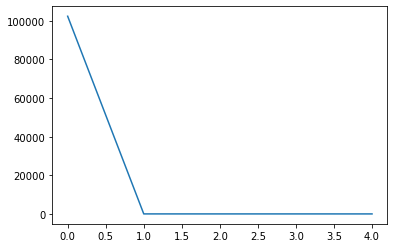

In [23]:
# plot the accuracy
plt.figure()
plt.plot(np.arange(0, 5), results.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), results.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

### Let's have a look at the feature maps

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims

# redefine model to output right after the first hidden layer
model_small = Model(inputs=model.inputs, outputs=model.layers[1].output)
model_small.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [25]:
# load the image with the required shape
img = xtrain[0]
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys)

ValueError: cannot reshape array of size 193548 into shape (28,28)

In [26]:
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
img.shape

(1, 254, 254, 3)

In [27]:
# get feature map for first hidden layer
feature_maps = model_small.predict(img)
feature_maps[0]

array([[[  0.        ,  12.503687  ,   0.        , ...,   0.        ,
          10.327591  ,   0.        ],
        [  0.        ,   9.881701  ,  40.911186  , ...,   0.        ,
         153.96097   ,  74.55521   ],
        [  0.        ,   9.817109  ,  40.974907  , ...,   0.        ,
         154.02905   ,  74.56529   ],
        ...,
        [  0.        ,   8.382842  ,  38.58106   , ...,   0.        ,
         145.09924   ,  70.532776  ],
        [  0.        ,   8.382842  ,  38.58106   , ...,   0.        ,
         145.09924   ,  70.532776  ],
        [  1.7120812 ,   5.2957706 ,  81.46205   , ...,   0.        ,
         238.21196   , 179.47054   ]],

       [[  0.        ,  16.105614  ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  10.103467  ,  30.835403  , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   9.660303  ,  31.242985  , ...,   0.        ,
           0.        ,   0.        ],
        ...,


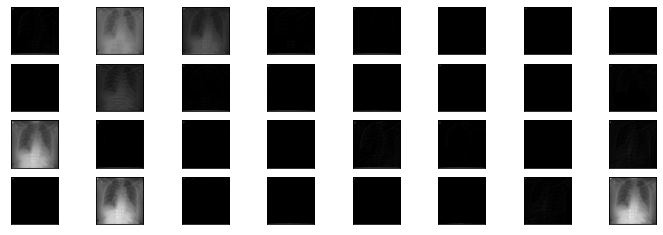

In [28]:
# plot all 32 maps in an 4*8 squares
height = 4
width = 8
ix = 1
plt.figure(figsize=(12,4))
for _ in range(height):
    for _ in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(height, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

## Further readings

#### Stanford Ressource

https://cs231n.github.io/convolutional-networks/

#### Dive into the math behind convolutional neural networks

https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9

## Visualization

#### Visualization toolbox

https://www.youtube.com/watch?v=AgkfIQ4IGaM

#### How to visualize filters in cnns

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

#### How to visualize filters in deep layers

https://www.researchgate.net/profile/Aaron_Courville/publication/265022827_Visualizing_Higher-Layer_Features_of_a_Deep_Network/links/53ff82b00cf24c81027da530.pdf